In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df = df.drop(["Loan_ID"], axis =1)

In [ ]:
encode = LabelEncoder()
encdf = pd.get_dummies(df,drop_first=True)
encdf.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [ ]:
df = df.astype({'Gender_Male': int})
df = df.astype({'Married_Yes': int}) 
df = df.astype({'Dependents_1': int}) 
df = df.astype({'Dependents_2': int})
df = df.astype({'Dependents_3+': int})
df = df.astype({'Education_Not Graduate': int})
df = df.astype({'Self_Employed_Yes': int})
df = df.astype({'Property_Area_Semiurban': int})
df = df.astype({'Property_Area_Urban': int})

KeyError: ignored

In [ ]:
X = encdf.drop(columns="Loan_Status_Y")
Y = encdf['Loan_Status_Y']

In [ ]:
X.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state =101)
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
382,6000,0.0,156.0,360.0,1.0,0,0,0,0,0,0,0,0,1
597,2987,0.0,88.0,360.0,0.0,1,0,0,0,0,0,0,1,0
388,2333,2417.0,136.0,360.0,1.0,1,1,0,0,0,0,0,0,1
278,14583,0.0,436.0,360.0,1.0,1,1,0,0,0,0,0,1,0
31,3167,0.0,74.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [ ]:
x_train['LoanAmount'].fillna(x_train['LoanAmount'].mean(), inplace=True)
x_train['Loan_Amount_Term'].fillna(x_train['Loan_Amount_Term'].mean(), inplace=True)
x_train['LoanAmount'].fillna(x_train['LoanAmount'].mean(), inplace=True)
x_train['Credit_History'].fillna(x_train['Credit_History'].median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
x_train.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
382,6000,0.000000,156.0,360.0,1.0,0,0,0,0,0,0,0,0,1
597,2987,0.000000,88.0,360.0,0.0,1,0,0,0,0,0,0,1,0
388,2333,2417.000000,136.0,360.0,1.0,1,1,0,0,0,0,0,0,1
278,14583,0.000000,436.0,360.0,1.0,1,1,0,0,0,0,0,1,0
31,3167,0.000000,74.0,360.0,1.0,1,0,0,0,0,0,0,0,1
62,2609,3449.000000,165.0,180.0,0.0,1,1,0,0,0,1,1,0,0
324,15000,0.000000,300.0,360.0,1.0,1,1,0,0,1,0,0,0,0
573,6125,1625.000000,187.0,480.0,1.0,1,1,0,1,0,1,0,1,0
403,1963,0.000000,53.0,360.0,1.0,0,0,0,0,0,1,0,1,0
118,5568,2142.000000,175.0,360.0,1.0,1,1,0,0,0,0,0,0,0


In [ ]:
x_train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 382 to 523
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          491 non-null    int64  
 1   CoapplicantIncome        491 non-null    float64
 2   LoanAmount               491 non-null    float64
 3   Loan_Amount_Term         491 non-null    float64
 4   Credit_History           491 non-null    float64
 5   Gender_Male              491 non-null    uint8  
 6   Married_Yes              491 non-null    uint8  
 7   Dependents_1             491 non-null    uint8  
 8   Dependents_2             491 non-null    uint8  
 9   Dependents_3+            491 non-null    uint8  
 10  Education_Not Graduate   491 non-null    uint8  
 11  Self_Employed_Yes        491 non-null    uint8  
 12  Property_Area_Semiurban  491 non-null    uint8  
 13  Property_Area_Urban      491 non-null    uint8  
dtypes: float64(4), int64(1),

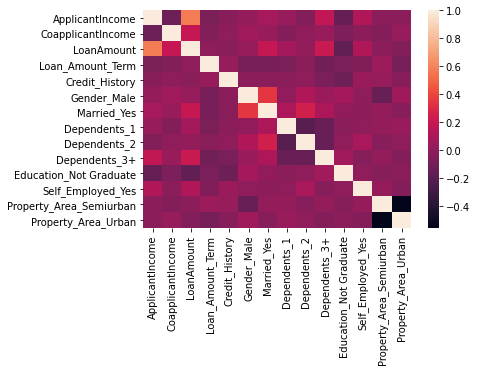

In [ ]:
sn.heatmap(x_train.corr())
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.fit_transform(x_test)

knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

y_pred_knn = knn.predict(x_train_scaled)

accuracy_score(y_train, y_pred_knn)

0.824847250509165

In [ ]:
f1_score(y_train, y_pred_knn)

0.8853333333333334

In [ ]:
from sklearn.tree import DecisionTreeClassifier
desctree = DecisionTreeClassifier()

desctree.fit(x_train, y_train)
y_pred_tree = desctree.predict(x_train)
accuracy_score(y_train,y_pred_tree)

1.0

In [ ]:
f1_score(y_train, y_pred_tree)
# overfitting

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randfo = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10)
randfo.fit(x_train, y_train)
y_pred_randfo = randfo.predict(x_train)
accuracy_score(y_train, y_pred_randfo)

0.8085539714867617

In [ ]:
f1_score(y_train, y_pred_randfo)

0.8788659793814433